# Лабораторная работа №1. Численное дифференцирование

### Аннотация
В ходе данной лабораторной работы производится численный расчёт производных некоторых функций по формулам из следующего списка:
1. $\frac{df}{dx}(x) = \frac{f(x+h) - f(x)}{h}$

2. $\frac{df}{dx}(x) = \frac{f(x) - f(x-h)}{h}$

3. $\frac{df}{dx}(x) = \frac{f(x+h) - f(x-h)}{2h}$

4. $\frac{df}{dx}(x) = \frac{4}{3}\frac{f(x+h) - f(x-h)}{2h} - \frac{1}{3}\frac{f(x+2h) - f(x-2h)}{4h}$

5. $\frac{df}{dx}(x) = \frac{3}{2}\frac{f(x+h) - f(x-h)}{2h} - \frac{3}{5}\frac{f(x+2h) - f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h) - f(x-3h)}{6h}$

Рассматриваемые функции:
1. $\sin{(x^2)}$
2. $\cos{(\sin{(x)})}$
3. $\exp{(\sin{(\cos{(x)})})}$
4. $\ln{(x + 3)}$
5. $(x + 3)^{0.5}$

Полученные результаты графически сравниваются со значениями производных, полученными аналитически:
1. $\left(\sin{(x^2)}\right)' = 2x \cdot \cos{(x^2)}$
2. $\left(\cos{(\sin{(x)})}\right)' = -\sin{(\sin{x})} \cdot \cos{x}$
3. $\left(\exp{(\sin{(\cos{(x)})})}\right)' = -e^{\sin{(\cos{x})}} \cdot \cos{(\cos{x})} \cdot \sin{x}$
4. $\left(\ln{(x + 3)}\right)' = \frac{1}{x + 3}$
5. $\left((x + 3)^{0.5}\right)' = \frac{1}{2\sqrt{x + 3}}$


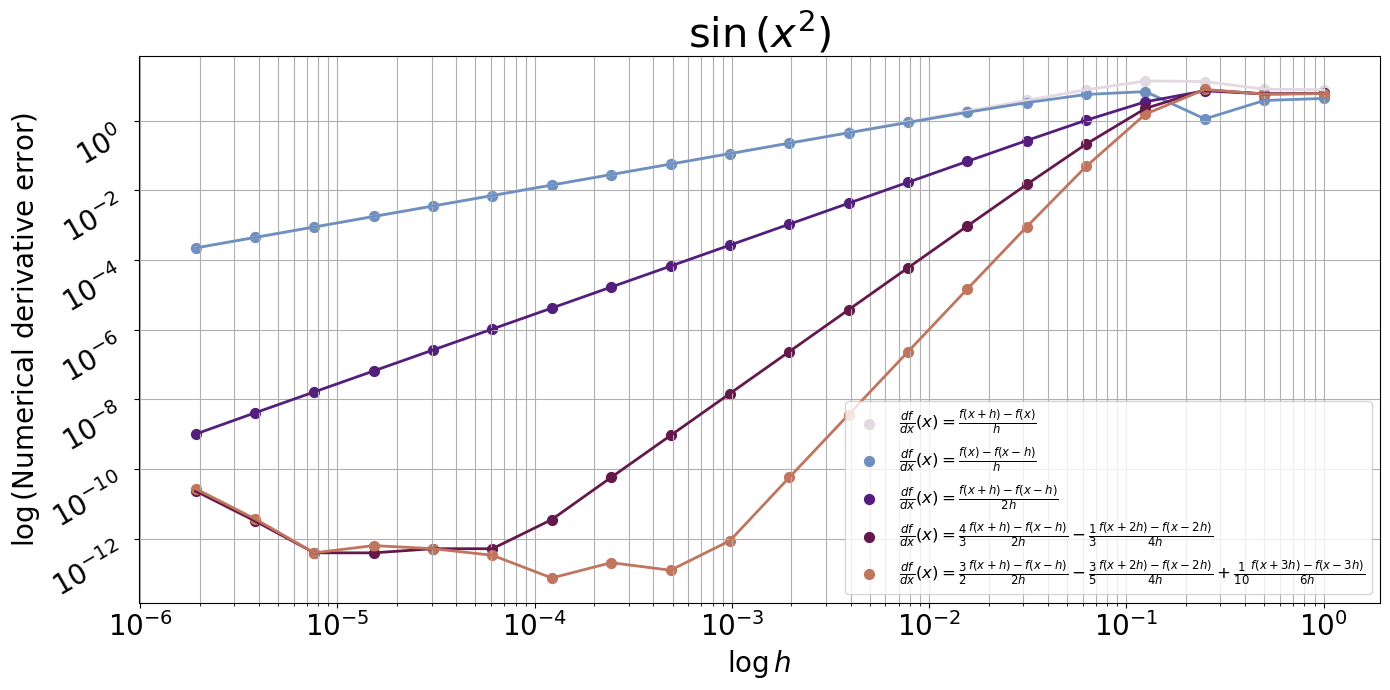

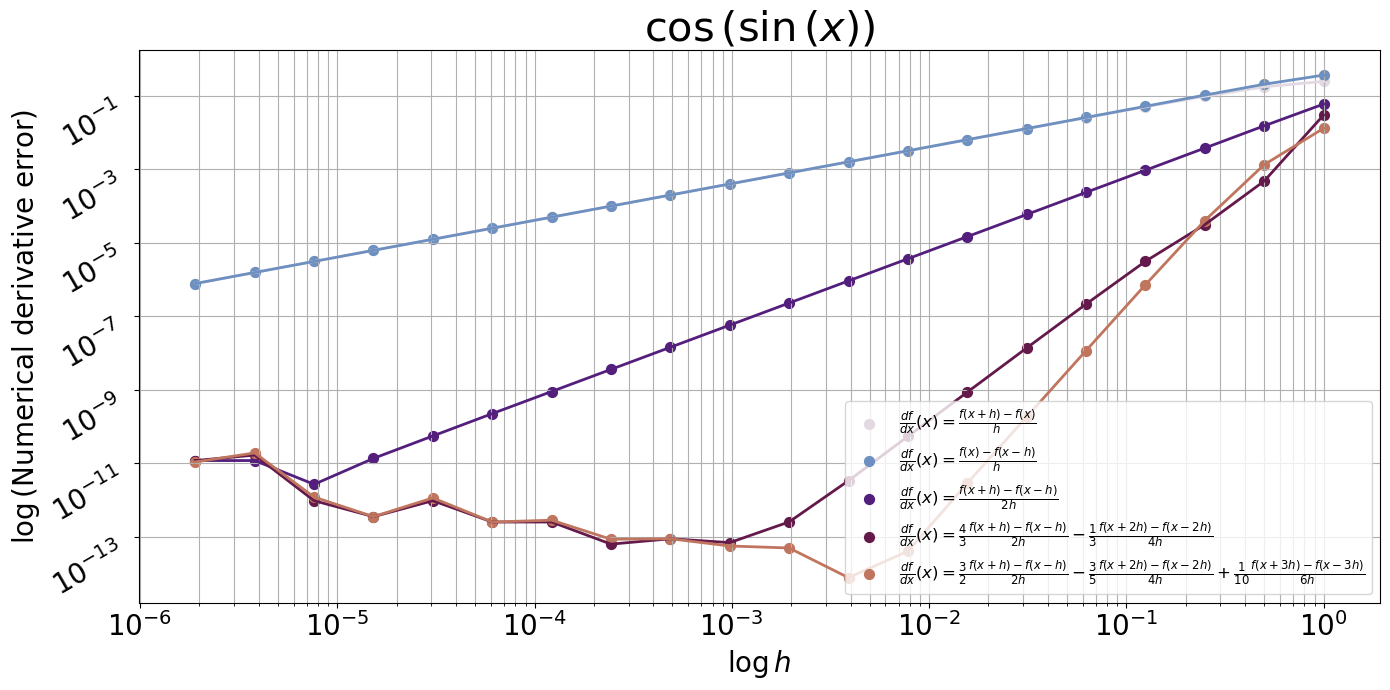

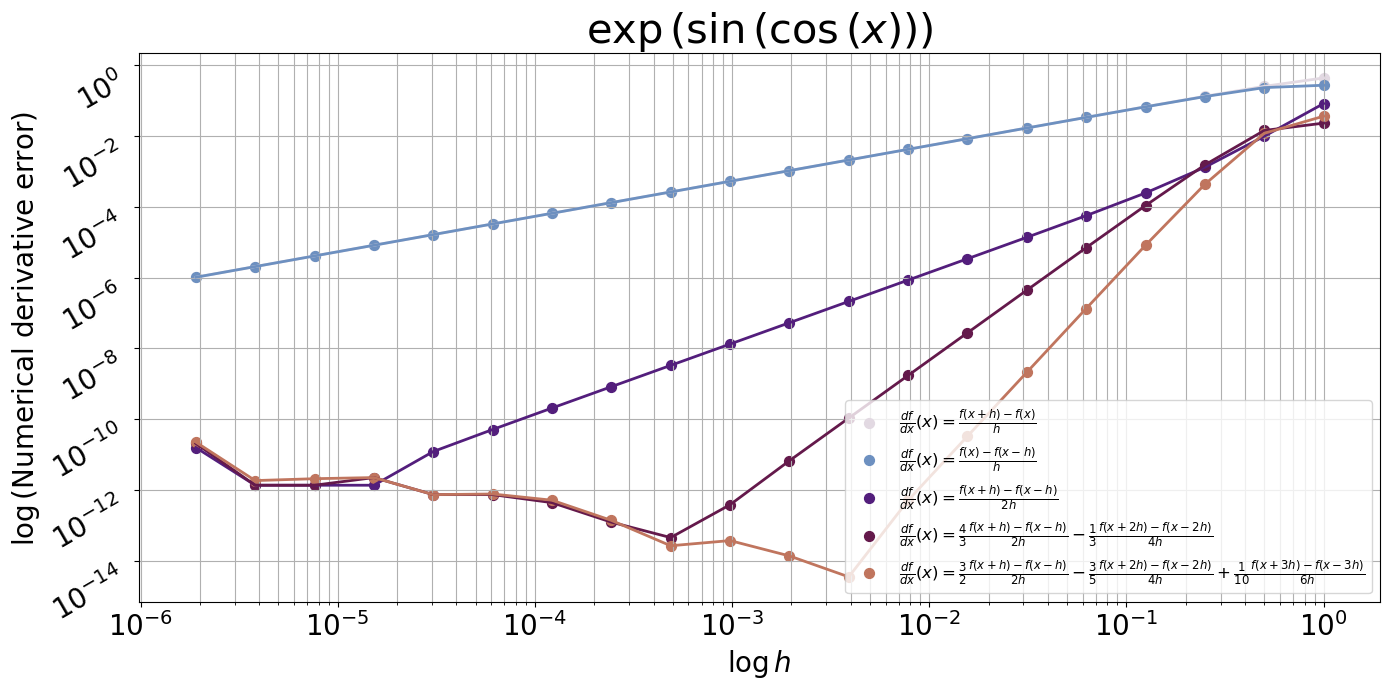

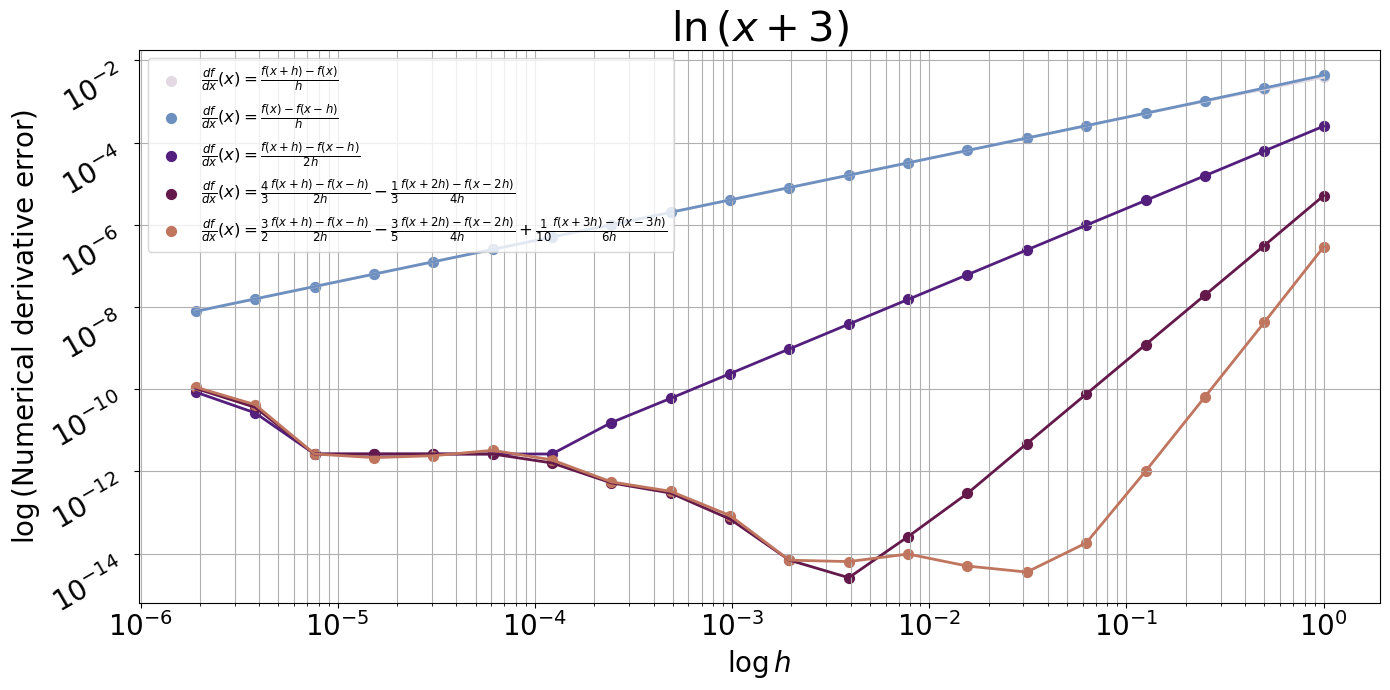

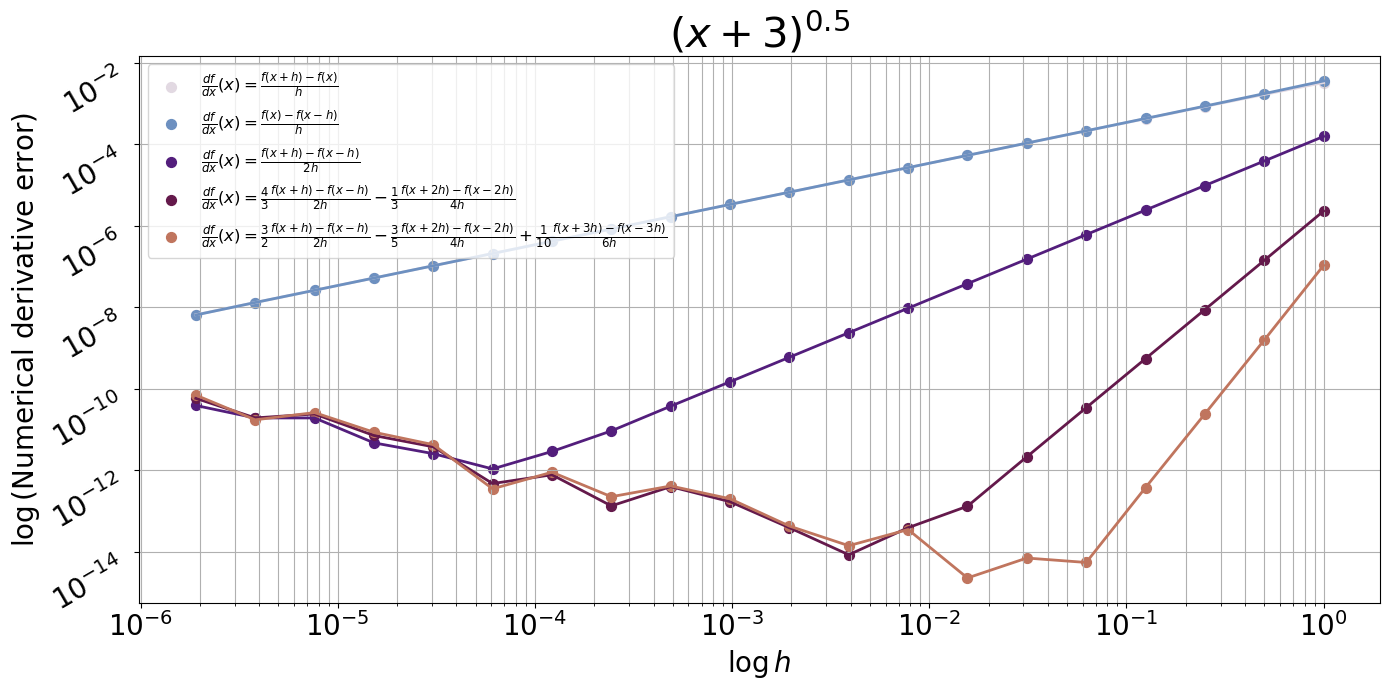

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Functions:
def f1(x):
    return np.sin(x ** 2)

def f2(x):
    return np.cos(np.sin(x))

def f3(x):
    return np.exp(np.sin(np.cos(x)))

def f4(x):
    return np.log(x + 3)

def f5(x):
    return np.sqrt(x + 3)

#Analytical derivatives:
def deriv_f1(x):
    return 2 * x * np.cos(x ** 2)

def deriv_f2(x):
    return -np.sin(np.sin(x)) * np.cos(x)

def deriv_f3(x):
    return -np.sin(x) * np.cos(np.cos(x)) * np.exp(np.sin(np.cos(x)))

def deriv_f4(x):
    return 1 / (x + 3)

def deriv_f5(x):
    return 1 / (2 * np.sqrt(x + 3))

#Numerical derivatives
def num_deriv_1(f, x, h):
    return (f(x + h) - f(x)) / h

def num_deriv_2(f, x, h):
    return (f(x) - f(x - h)) / h

def num_deriv_3(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def num_deriv_4(f, x, h):
    return (4 / 3) * ((f(x + h) - f(x - h)) / (2 * h)) - (1 / 3) * ((f(x + 2 * h) - f(x - 2 * h)) / (4 * h))

def num_deriv_5(f, x, h):
    return (3 / 2) * ((f(x + h) - f(x - h)) / (2 * h)) - (3 / 5) * ((f(x + 2 * h) - f(x - 2 * h)) / (4 * h)) + (1 / 10) * ((f(x + 3 * h) - f(x - 3 * h)) / (6 * h))

x = 8.0
h = [(2 / 2 ** i) for i in range(1, 21)]

functions = [f1, f2, f3, f4, f5]
derivatives = [deriv_f1, deriv_f2, deriv_f3, deriv_f4, deriv_f5]
num_derivs = [num_deriv_1, num_deriv_2, num_deriv_3, num_deriv_4, num_deriv_5]

data = []
for i in range(len(functions)):
    func_data = []
    for j in range(len(num_derivs)):
        func_data.append([])
    data.append(func_data)

for i in range(len(functions)):
    current_func = functions[i]
    current_deriv = derivatives[i]

    for j in range(len(num_derivs)):
        current_num_deriv = num_derivs[j]
        current_array = data[i][j]

        for step in h:
            numerical_result = current_num_deriv(current_func, x, step)
            exact_result = current_deriv(x)
            error = np.fabs(numerical_result - exact_result)
            current_array.append(error)

twilight_colors = plt.cm.twilight(np.linspace(0, 1, 6))

for i in range(len(functions)):
    plt.figure(figsize=[14, 7])

    function_names = [
        "$\\sin{(x^2)}$",
        "$\\cos{(\\sin{(x)})}$",
        "$\\exp{(\\sin{(\\cos{(x)})})}$",
        "$\\ln{(x + 3)}$",
        "$(x + 3)^{0.5}$"
    ]

    plt.title(function_names[i], fontsize=30)

    plt.xscale("log")
    plt.yscale("log")

    plt.xlabel('$\\log{h}$', fontsize=20)
    plt.xticks(fontsize=20, ha="center", va="top")

    plt.ylabel("$\\log{(\\text{Numerical derivative error})}$", fontsize=20)
    plt.yticks(fontsize=20, rotation=30, ha="right", va="top")

    plt.grid(which="both")

    num_deriv_names = [
        "$\\frac{df}{dx}(x) = \\frac{f(x+h) - f(x)}{h}$",
        "$\\frac{df}{dx}(x) = \\frac{f(x) - f(x-h)}{h}$",
        "$\\frac{df}{dx}(x) = \\frac{f(x+h) - f(x-h)}{2h}$",
        "$\\frac{df}{dx}(x) = \\frac{4}{3}\\frac{f(x+h) - f(x-h)}{2h} - \\frac{1}{3}\\frac{f(x+2h) - f(x-2h)}{4h}$",
        "$\\frac{df}{dx}(x) = \\frac{3}{2}\\frac{f(x+h) - f(x-h)}{2h} - \\frac{3}{5}\\frac{f(x+2h) - f(x-2h)}{4h} + \\frac{1}{10}\\frac{f(x+3h) - f(x-3h)}{6h}$"
    ]

    for j in range(len(num_derivs)):
        func_arr = data[i][j]
        color = twilight_colors[j]

        plt.scatter(np.array(h), np.array(func_arr), label=num_deriv_names[j], color=color, s=50)
        plt.plot(np.array(h), np.array(func_arr), color=color, linewidth=2)

    plt.legend(loc="best", fontsize=12)
    plt.tight_layout()
    plt.show()

### Вывод
Как видно из графиков, представленных выше, ошибка численного дифференцирования нелинейно зависит от шага сетки. При этом наименьшую ошибку по сравнению с точным дифференцированием даёт метод расчёта производной, представленный формулой $\frac{df}{dx}(x) = \frac{3}{2}\frac{f(x+h) - f(x-h)}{2h} - \frac{3}{5}\frac{f(x+2h) - f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h) - f(x-3h)}{6h}$.